# Grouping Algorithm

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

The *input_id* corresponds to the dataset used in this analysis. (See *Input* directory for more information)

In [2]:
input_id = 1

### Load SODA_parameters

In [3]:
with open('Kernel/SODA_parameters_{}.pkl'.format(input_id), 'rb') as f:
    SODA_parameters = pickle.load(f)

### Load Target

In [4]:
with open('Kernel/final_target_{}.pkl'.format(input_id), 'rb') as f:
    target = pickle.load(f)

### Grouping Algorithm

In [5]:
gra = list(SODA_parameters.keys())[:-1]

GA_parameters = {}

for g in gra:
    SodaOutput = SODA_parameters[g]
            
    #### Program Matrix's and Variables ####

    define_percent = 50
    n_DA_planes = np.max(SodaOutput)
    Percent = np.zeros((int(n_DA_planes),3))
    n_IDs_per_gp = np.zeros((int(n_DA_planes),2))
    n_tot_Id_per_DA = np.zeros((int(n_DA_planes),1))
    decision = np.zeros(int(n_DA_planes))
    selected_samples = np.zeros(2)
    n_gp0 = 0
    n_gp1 = 0
    k = 0

    #### Definition Percentage Calculation #####

    for i in range(target.shape[0]):

        if target[i] == 0:
            n_IDs_per_gp [int(SodaOutput[i]-1),0] += 1 
        else:
            n_IDs_per_gp [int(SodaOutput[i]-1),1] += 1 

        n_tot_Id_per_DA [int(SodaOutput[i]-1)] += 1 


    for i in range(int(n_DA_planes)):

        Percent[i,0] = (n_IDs_per_gp[i,0] / n_tot_Id_per_DA[i]) * 100
        Percent[i,1] = (n_IDs_per_gp[i,1] / n_tot_Id_per_DA[i]) * 100
            
    #### Using Definition Percentage as Decision Parameter ####

    for i in range(Percent.shape[0]):

        if (Percent[i,0] > define_percent):
            n_gp0 += 1
            decision[i] = 0
        else:
            n_gp1 += 1
            decision[i] = 1
                  
            #### Defining labels

    ClassifiersLabel = []

    for i in range (len(SodaOutput)):
        ClassifiersLabel.append(decision[int (SodaOutput[i]-1)])
            
    GA_parameters[g] = ClassifiersLabel

    ### Printig Analitics results
            
    print(g)
    print('Number of data clouds: %d' % n_DA_planes)
    print('Number of good tools groups: %d' % n_gp0)
    print('Number of worn tools groups: %d' % n_gp1)
    print('Number of samples: %d' % int(len(SodaOutput)))
    print('---------------------------------------------------')

granularity_1
Number of data clouds: 1
Number of good tools groups: 1
Number of worn tools groups: 0
Number of samples: 414
---------------------------------------------------
granularity_2
Number of data clouds: 2
Number of good tools groups: 1
Number of worn tools groups: 1
Number of samples: 414
---------------------------------------------------
granularity_3
Number of data clouds: 3
Number of good tools groups: 2
Number of worn tools groups: 1
Number of samples: 414
---------------------------------------------------
granularity_4
Number of data clouds: 4
Number of good tools groups: 2
Number of worn tools groups: 2
Number of samples: 414
---------------------------------------------------
granularity_5
Number of data clouds: 3
Number of good tools groups: 2
Number of worn tools groups: 1
Number of samples: 414
---------------------------------------------------
granularity_6
Number of data clouds: 4
Number of good tools groups: 2
Number of worn tools groups: 2
Number of samples: 

### Load Reduced Features

In [6]:
with open('Kernel/reduced_features_{}.pkl'.format(input_id), 'rb') as f:
    reduced_features = pickle.load(f)

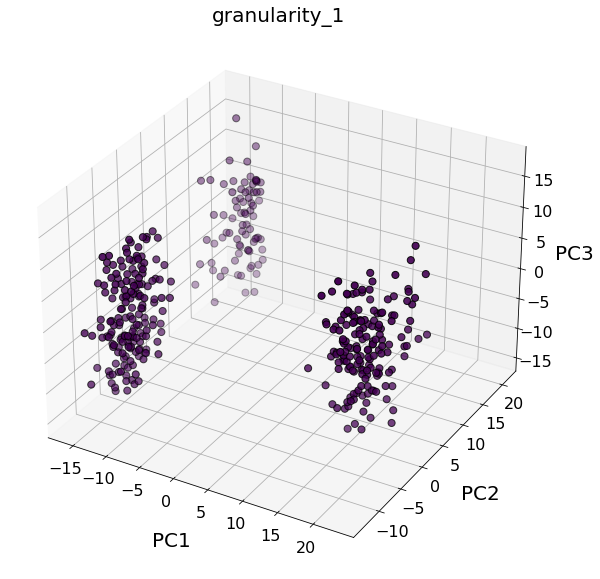

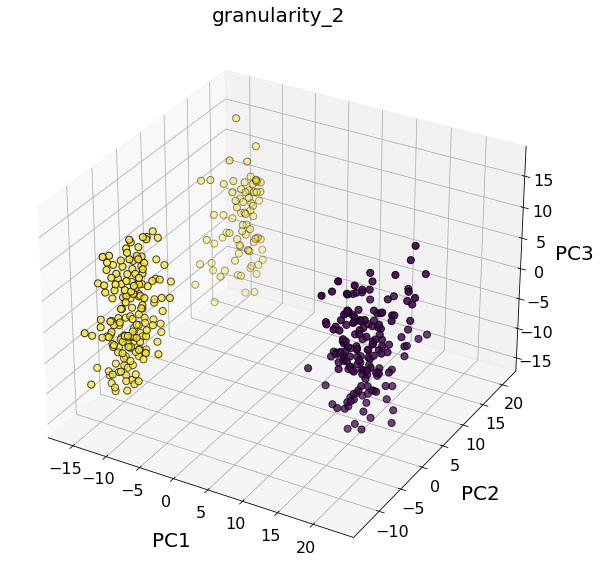

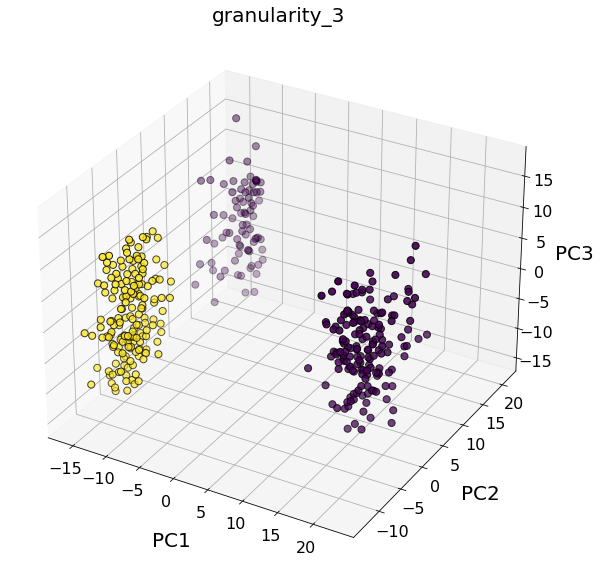

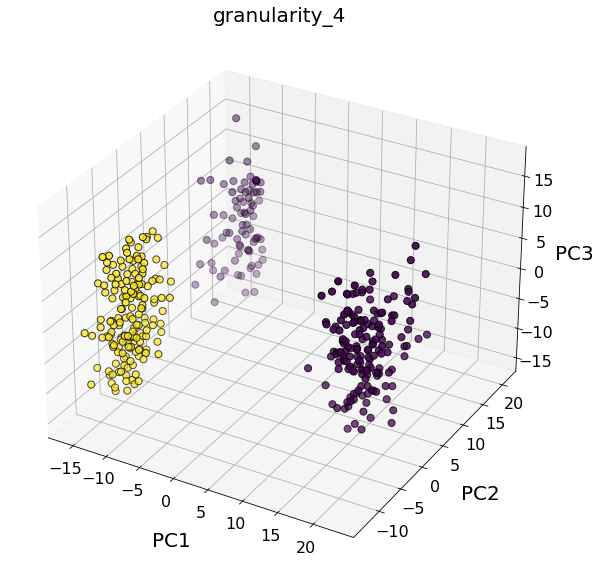

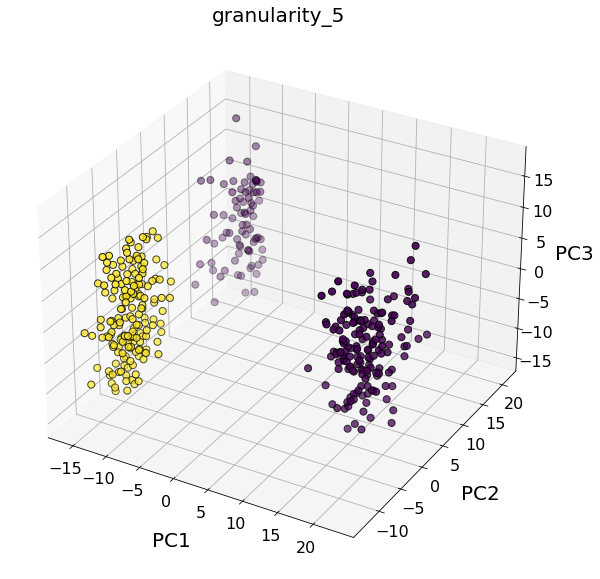

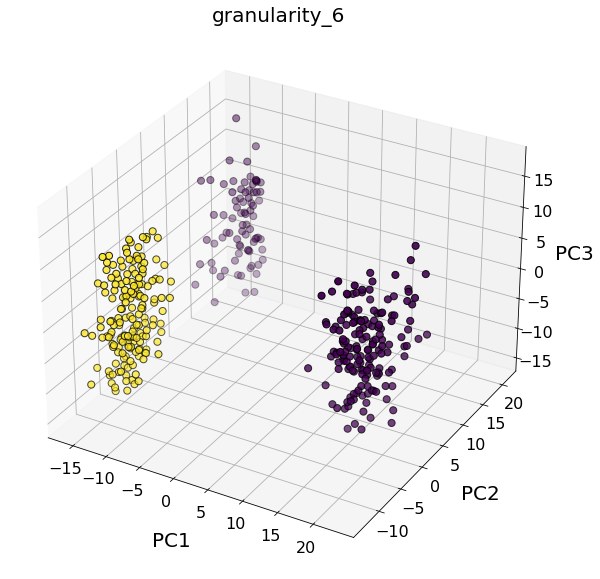

In [7]:
#Ploting the projected data
gra = list(SODA_parameters.keys())[:-1]

x = reduced_features[:,0]
y = reduced_features[:,1]
z = reduced_features[:,2]
                    
for g in gra:
    fig = plt.figure(figsize=[14,10])
    ax = fig.add_subplot(111, projection='3d')

    colors = GA_parameters[g]
    ax.scatter(x, y, z, c=colors, s=50, edgecolor='k')
    
    plt.title(g, fontsize=20)
    plt.ylabel('PC2',fontsize = 20,labelpad=18)
    plt.xlabel('PC1',fontsize = 20, labelpad=18)
    ax.set_zlabel('PC3', fontsize = 20, labelpad=12)
    plt.tick_params(axis='x', labelsize=16)
    plt.tick_params(axis='y', labelsize=16)
    plt.tick_params(axis='z', labelsize=16)
    ax.grid()
    plt.show()
    fig.savefig('GA_Plots/Scatter_GA_{}_{}.png'.format(input_id,g), bbox_inches='tight')                

In [8]:
with open('Kernel/GA_parameters_{}.pkl'.format(input_id), 'wb') as f:
    pickle.dump(GA_parameters, f)